In [1]:
# load required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#load dataset
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("pima-indians-diabetes.csv", header = None, names = col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [13]:
#Feature selection
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]  #Selected features
X = X[1:]
y = pima.label          #Class/output variable
y = y[1:]

In [4]:
#Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
X_test

,pregnant,insulin,bmi,age,glucose,bp,pedigree
286,7,135,26,51,136,74,0.647
102,1,0,26.1,22,151,60,0.179
582,6,0,25,27,109,60,0.206
353,3,0,34.4,46,61,82,0.243
727,1,180,36.1,25,116,78,0.496
473,0,0,38.8,22,119,66,0.259
234,4,0,35,29,122,68,0.394
386,1,50,22.3,24,119,54,0.205
557,1,0,38.1,30,97,70,0.218
60,0,142,41.5,22,105,64,0.173


In [5]:
#Building decision tree model
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train,y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
y_pred = clf.predict(X_test)

In [7]:
#Evaluate your model
print("Accuracy = ", metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.7662337662337663


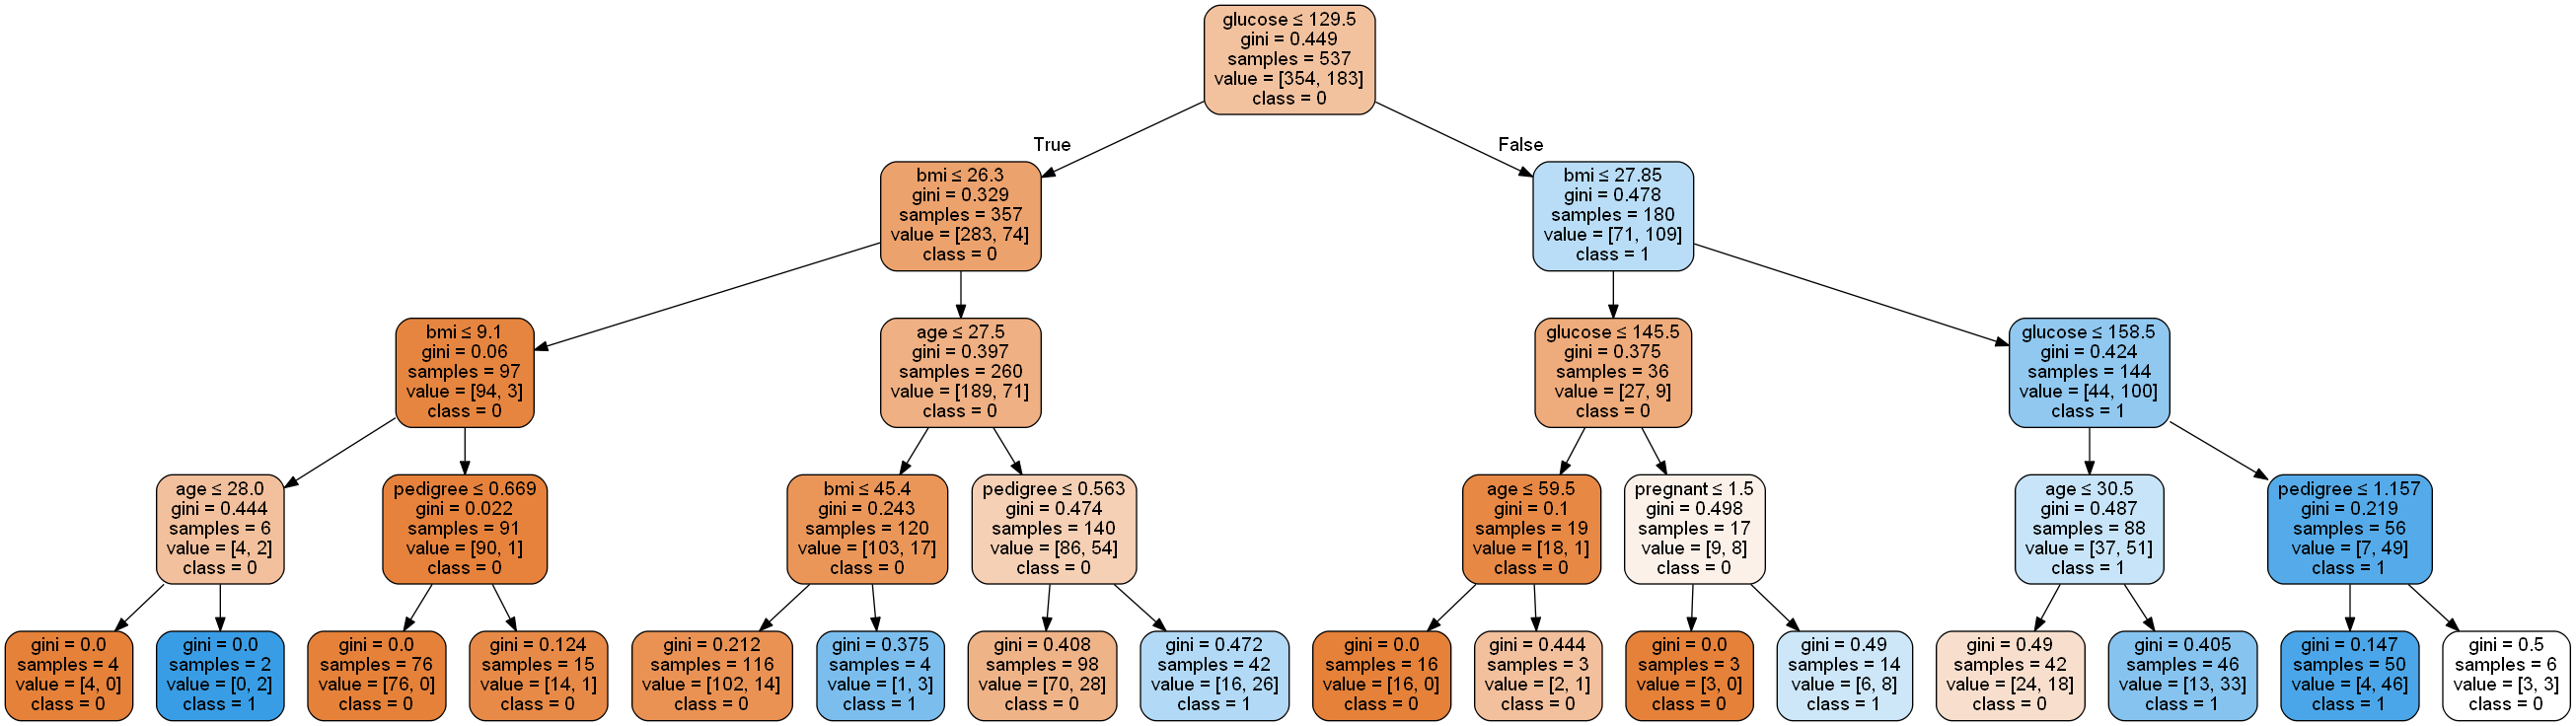

In [8]:
# To visualize the generated decision tree in tree form, you can use
# graphviz function

# pip install graphviz and then conda install graphviz 
# pip install pydotplus and then conda install pydotplus, if you have anaconda

#After successfully installed these two packages, run the following script

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
                 filled = True, rounded = True,
               special_characters=True, feature_names=feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('pima-indians-diabetes-gini.png')
Image(graph.create_png())